In [37]:
#!pip install natsort
#!pip install seaborn
#!pip install glob2
#!pip install xarray

In [38]:
import pandas as pd
%pylab inline
import seaborn as sns
import glob2
#Trying to work out a safety for natsort
from types import ModuleType
from natsort import natsort as ns
if isinstance(ns, ModuleType):
    natsort = ns.natsorted
else:
    nasort = ns

Populating the interactive namespace from numpy and matplotlib


In [39]:
ls

Untitled.ipynb  pandas_analysis-Copy1.ipynb


## A

In [40]:
#rdir = '/workspace'
rdir = '../'

dat_filesB = ns(glob2.glob(rdir + 'results/B/**/*.dat'))
dat_filesC = ns(glob2.glob(rdir + 'results/C/**/*.dat'))


len(dat_files)
dat_files

['../results/C/0/results_modelC_0.dat',
 '../results/C/1/results_modelC_1.dat',
 '../results/C/2/results_modelC_2.dat',
 '../results/C/3/results_modelC_3.dat',
 '../results/C/4/results_modelC_4.dat']

In [41]:
columns2 = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone',
            'lRidge', 'rRidge', 'realtime']

In [42]:
columns3 = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            
            'minVel','maxVel', 'minVxsurf', 'maxVxsurf', 'surfLength', 
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone',
            'lRidge', 'rRidge', 'realtime']


In [43]:

#df = pd.read_csv('../results/D/2/results_modelD_2.dat', sep="\s*", header=None,  index_col=False)

#df.columns = columns3

#df['rmsSurfScaled'] = (df['rmsSurf']/(2900.*1e3/1e-6))*(1e2*3600*24*365)
#df['realtimeScaled'] = (df['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)



#df2 = pd.read_csv('../results/D/11/results_modelD_11.dat', sep="\s*", header=None,  index_col=False)

#df2.columns = columns3

#df2['rmsSurfScaled'] = (df['rmsSurf']/(2900.*1e3/1e-6))*(1e2*3600*24*365)
#df2['realtimeScaled'] = (df['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)

In [45]:
dfC = pd.read_csv(dat_filesC[0], sep="\s*", header=None,  index_col=False)
dfC.columns = columns3

dfC['rmsSurfScaled'] = (dfC['rmsSurf']/(2900.*1e3/1e-6))*(1e2*3600*24*365)
dfC['realtimeScaled'] = (dfC['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)


dfB = pd.read_csv(dat_filesB[0], sep="\s*", header=None,  index_col=False)
dfB.columns = columns3

dfB['rmsSurfScaled'] = (dfB['rmsSurf']/(2900.*1e3/1e-6))*(1e2*3600*24*365)
dfB['realtimeScaled'] = (dfB['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


(0, 20)

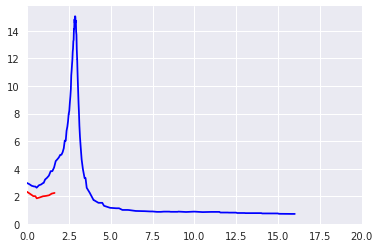

In [48]:
fig, ax = plt.subplots()

ax.plot(dfB['realtimeScaled'] , (dfB['rmsSurf']/dfB['surfLength']/(2900.*1e3/1e-6))*(1e2*3600*24*365), c='r' )

ax.plot(dfC['realtimeScaled'] , (dfC['rmsSurf']/dfC['surfLength']/(2900.*1e3/1e-6))*(1e2*3600*24*365), c='b' )
#ax.plot(df2['realtimeScaled'] , (df2['rmsSurf']/df2['surfLength']/(2900.*1e3/1e-6))*(1e2*3600*24*365), c='r' )

#ax.plot(df['realtimeScaled'] , (df['areaintLith']/df['areaintLower']), c='b' )
#ax.plot(df['realtimeScaled'] , (df['vdintLower']), c='b' )
#ax.plot(df['realtimeScaled'] , (df['vdintLith']), c='b' )


ax.set_xlim(0, 20)

In [66]:
#np.argmax(dfC['rmsSurf'])


In [50]:
import h5py

In [67]:
with h5py.File('../results/velxSurface_262.h5','r') as hf:
    data = hf.get('data')
    np_data = np.array(data)

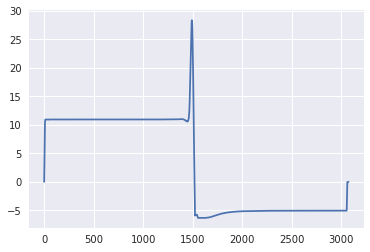

In [68]:
plt.plot((np_data/(2900.*1e3/1e-6)*(1e2*3600*24*365)))